In [2]:
%notebook matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as ps


In [3]:
# A dictionary of movie critics and their ratings of a small
# set of movies
critics={
    'Lisa Rose': {
            'Lady in the Water': 2.5,
            'Snakes on a Plane': 3.5,
             'Just My Luck': 3.0,
            'Superman Returns': 3.5,
            'You, Me and Dupree': 2.5,
             'The Night Listener': 3.0
    },
    'Gene Seymour': {
            'Lady in the Water': 3.0, 
            'Snakes on a Plane': 3.5,
             'Just My Luck': 1.5,
            'Superman Returns': 5.0, 
            'The Night Listener': 3.0,
             'You, Me and Dupree': 3.5
    },
    'Michael Phillips': {
            'Lady in the Water': 2.5, 
            'Snakes on a Plane': 3.0,
             'Superman Returns': 3.5,
            'The Night Listener': 4.0
    },
    'Claudia Puig': {
            'Snakes on a Plane': 3.5, 
             'Just My Luck': 3.0,
             'The Night Listener': 4.5, 
            'Superman Returns': 4.0,
             'You, Me and Dupree': 2.5
    },
    'Mick LaSalle':{
            'Lady in the Water': 3.0, 
            'Snakes on a Plane': 4.0,
             'Just My Luck': 2.0, 
            'Superman Returns': 3.0,
            'The Night Listener': 3.0,
             'You, Me and Dupree': 2.0
    },
    'Jack Matthews': {
            'Lady in the Water': 3.0,
             'Snakes on a Plane': 4.0,
             'The Night Listener': 3.0,
             'Superman Returns': 5.0,
             'You, Me and Dupree': 3.5
    },
    'Toby': {
            'Snakes on a Plane':4.5,
             'You, Me and Dupree':1.0,
             'Superman Returns':4.0
    }
}

In [4]:
critics['Lisa Rose']['Lady in the Water']


2.5

In [5]:
# Finding Similar Users

In [6]:
# Euclidean Distance
snakes='Snakes on a Plane'
dupree='You, Me and Dupree'
Snakes=[]
Dupree=[]
Names=[]
for x in critics:
    Names.append(x)
    if(snakes in critics[x] and dupree in critics[x]):
        Snakes.append(critics[x][snakes])
        Dupree.append(critics[x][dupree])

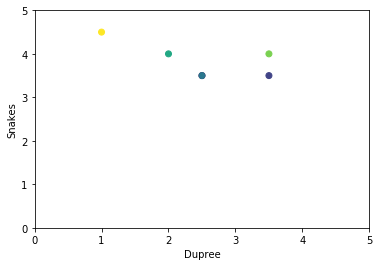

In [7]:
plt.figure()
plt.scatter(x=Dupree,y=Snakes,c=[0,1,2,3,4,5])
ax=plt.gca()
ax.set_xlim(0,5)
ax.set_ylim(0,5)
plt.xlabel('Dupree')
plt.ylabel('Snakes')
plt.show();

In [8]:
from math import sqrt
#Returns a distance- based Similarity Score for person 1 and 
#person2
def sim_distance(prefs,person1,person2):
    # list of shared Items
    si = {}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
            
    # if no ratings is common, return 0
    if len(si)==0:
        return 0
    
    sum_of_squares = [ pow(prefs[person1][item]-prefs[person2][item],2)
                      for item in prefs[person1] if item in prefs[person2]]
    
    return 1/(1+sum(sum_of_squares))

In [9]:
sim_distance(critics,'Lisa Rose','Gene Seymour')

0.14814814814814814

In [10]:
# Pearson Score
#One interesting aspect of using the Pearson score is that it corrects for grade inflation. 
#If one critic is inclined to give higher scores than the other, there can still be
#perfect correlation if the difference between their scores is consistent. The Euclidean
#distance score described earlier will say that two critics are dissimilar because one is
#consistently harsher than the other, even if their tastes are very similar.

In [11]:
# Returns the Pearson Correlation coefficient
def sim_pearson(prefs,p1,p2):
    si={} # Items rated by both users
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item]=1
    n = len(si) # number of items rated by both users
    if n==0:  return 0
    
    # individual sums
    sum1 =sum([prefs[p1][it] for it in si])
    sum2 =sum([prefs[p2][it] for it in si])
        
    # sum of squares
    sum1Sq =sum([ pow(prefs[p1][it],2) for it in si])
    sum2Sq =sum([ pow(prefs[p2][it],2) for it in si])
    
    # product sum
    pSum = sum([prefs[p1][it]*prefs[p2][it]  for it in si  ])

    # Calcualte Pearson Score
    num = pSum- (sum1*sum2/n)
    den = sqrt ((sum1Sq - pow(sum1,2)/n) * (sum2Sq-pow(sum2,2)/n) )
    
    if den==0: return 0
    return num/den


In [12]:
print(sim_pearson(critics,'Lisa Rose','Gene Seymour'))

0.39605901719066977


In [13]:
# Ranking the Critics
# Which movie critics have tastes simliar to person so that
# I know whose advice I should take when deciding on a movie. 

def topMatches(prefs,person,n=5,similarity = sim_pearson):
    scores = [ (similarity(prefs,person,other),other) for other in prefs if other!=person]
    
    scores.sort()
    scores.reverse() # top match at top
    return scores[0:n]

In [14]:
topMatches(critics,'Toby',n=3)

# Top Person , indicates the similar taste in movies , so I should take advice from top matches only

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

In [18]:
# of every other user's rankings
def getRecommendations(prefs,person,similarity=sim_pearson):
    totals={}
    simSums={}
    for other in prefs:
         # don't compare me to myself
        if other==person: continue
        sim=similarity(prefs,person,other)
         # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
             # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
                 # Similarity * Score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
                 # Sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
     # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
     # Return the sorted list
    rankings.sort( )
    rankings.reverse()
    return rankings

In [19]:
getRecommendations(critics,'Toby')

[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [20]:
# Here , we have explored the similarity of two persons on the basis of movies they have seen
# Similar calculations can be carried out to compare similarities of two movies
# So, we can recommend the movies similar to already watched movies


In [21]:
def tranformPrefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
            
            result[item][person] = prefs[person][item]
    return result

In [22]:
movies = tranformPrefs(critics)
topMatches(movies,'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

In [23]:
## Here we are twisting sides and getting recommended critics for a movie
getRecommendations(movies,'Just My Luck')  

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

## Item-Based Filtering

In [24]:
#The general technique is to precompute the most similar items for each item. 
#Then, when you wish to make recommendations to a user, you look at his top-rated
#items and create a weighted list of the items most similar to those. 

In [25]:
# BUILDING THE ITEM COMPARISON DATASET

In [27]:
def calculateSimilarItems(prefs,n=10):
     # Create a dictionary of items showing which other items they
     # are most similar to.
     result={}
     # Invert the preference matrix to be item-centric
     itemPrefs=tranformPrefs(prefs)
     c=0
     for item in itemPrefs:
         # Status updates for large datasets
         c+=1
         if c%100==0: print( "%d / %d" % (c,len(itemPrefs)) )
         # Find the most similar items to this one
         scores=topMatches(itemPrefs,item,n=n,similarity=sim_distance)
         result[item]=scores
     return result

In [28]:
# Similar Movies to Superman Returns
calculateSimilarItems(critics)['Superman Returns']

[(0.16666666666666666, 'Snakes on a Plane'),
 (0.10256410256410256, 'The Night Listener'),
 (0.09090909090909091, 'Lady in the Water'),
 (0.06451612903225806, 'Just My Luck'),
 (0.05333333333333334, 'You, Me and Dupree')]

In [29]:
# using the same weighted sum calculation ,we can calculate Recommended items and can give recommendations

In [33]:
def getRecommendedItems(prefs,itemMatch,user):
     userRatings=prefs[user]
     scores={}
     totalSim={}
     # Loop over items rated by this user
     for (item,rating) in userRatings.items( ):
         # Loop over items similar to this one
         for (similarity,item2) in itemMatch[item]:
             # Ignore if this user has already rated this item
             if item2 in userRatings: continue
             # Weighted sum of rating times similarity
             scores.setdefault(item2,0)
             scores[item2]+=similarity*rating
             # Sum of all the similarities
             totalSim.setdefault(item2,0)
             totalSim[item2]+=similarity
     # Divide each total score by total weighting to get an average
     rankings=[(score/totalSim[item],item) for item,score in scores.items( )]
     # Return the rankings from highest to lowest
     rankings.sort( )
     rankings.reverse( )
     return rankings

In [34]:
itemsim = calculateSimilarItems(critics)
getRecommendedItems(critics,itemsim,'Toby')

[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]

## Working on a Real data set


In [35]:
# from https://grouplens.org/datasets/movielens/
## Data Set has been modified by deleting the first line in both ratings and movies file

In [70]:
## Method to parse this dataset into out program logic
def loadMovieLens(path = './data/movielens'):
    movies ={}
    # movie titles
    for line in open(path + '/movies.csv',encoding='utf-8'):
        (id,title) = line.split(',')[0:2]
        movies[id]=title
        #print(line)
    # Load Data
    prefs={}
    for line in open(path + '/ratings.csv',encoding='utf-8'):
        (user,movieid,rating,timestamp) = line.split(',')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [79]:
prefs=loadMovieLens()
prefs['87']

{'"Birdcage': 4.0,
 '"Rock': 3.0,
 'Beavis and Butt-Head Do America (1996)': 2.0,
 'Black Sheep (1996)': 3.0,
 'Broken Arrow (1996)': 3.0,
 'Cold Comfort Farm (1995)': 5.0,
 'Eraser (1996)': 3.0,
 'Executive Decision (1996)': 4.0,
 'Fargo (1996)': 5.0,
 'Happy Gilmore (1996)': 4.0,
 'Independence Day (a.k.a. ID4) (1996)': 3.0,
 'Kids in the Hall: Brain Candy (1996)': 3.0,
 'Kingpin (1996)': 4.0,
 'Leaving Las Vegas (1995)': 4.0,
 'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)': 5.0,
 'Mighty Aphrodite (1995)': 4.0,
 'Mission: Impossible (1996)': 3.0,
 "Mr. Holland's Opus (1995)": 1.0,
 'Phenomenon (1996)': 3.0,
 'Rumble in the Bronx (Hont faan kui) (1995)': 3.0,
 'Sabrina (1995)': 3.0,
 'Shine (1996)': 5.0,
 'Star Wars: Episode IV - A New Hope (1977)': 4.0,
 'Star Wars: Episode VI - Return of the Jedi (1983)': 3.0,
 'Striptease (1996)': 3.0,
 'Tin Cup (1996)': 1.0,
 'Toy Story (1995)': 3.0,
 'Trainspotting (1996)': 3.0,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)': 3.0

In [80]:
## Getting recommendations for user id '87'
## USER BASED
getRecommendations(prefs,'87')[0:30]

[(5.0, 'Wrong Cops (2013)'),
 (5.0, 'Wrong (2012)'),
 (5.0, 'Wolf Children (Okami kodomo no ame to yuki) (2012)'),
 (5.0, 'Without a Clue (1988)'),
 (5.0, 'Wish Upon a Star (1996)'),
 (5.0, 'Willie & Phil (1980)'),
 (5.0, 'When Night Is Falling (1995)'),
 (5.0, 'Waltz with Bashir (Vals im Bashir) (2008)'),
 (5.0, 'Waiter (Ober) (2006)'),
 (5.0, 'Voyeur (Abel) (1986)'),
 (5.0, 'Visions of Light: The Art of Cinematography (1992)'),
 (5.0, 'Village of the Damned (1960)'),
 (5.0, 'Undertow (2004)'),
 (5.0, 'Trailer Park Boys (1999)'),
 (5.0, 'Through the Olive Trees (Zire darakhatan zeyton) (1994)'),
 (5.0, 'They All Laughed (1981)'),
 (5.0, 'Theremin: An Electronic Odyssey (1993)'),
 (5.0, 'The Slipper and the Rose: The Story of Cinderella (1976)'),
 (5.0, 'The Pacific (2010)'),
 (5.0, 'The Last Days of Emma Blank (2009)'),
 (5.0, 'The Earrings of Madame de... (1953)'),
 (5.0, 'The Dress (1996)'),
 (5.0, 'The Big Bus (1976)'),
 (5.0, 'The Beatles: Eight Days a Week - The Touring Years (20

In [82]:
## GETTING ITEM BASED RECOMMENDATIONS
## Slow , but builds only a single time
itemsim = calculateSimilarItems(prefs,n=50)

100 / 8963
200 / 8963
300 / 8963
400 / 8963
500 / 8963
600 / 8963
700 / 8963
800 / 8963
900 / 8963
1000 / 8963
1100 / 8963
1200 / 8963
1300 / 8963
1400 / 8963
1500 / 8963
1600 / 8963
1700 / 8963
1800 / 8963
1900 / 8963
2000 / 8963
2100 / 8963
2200 / 8963
2300 / 8963
2400 / 8963
2500 / 8963
2600 / 8963
2700 / 8963
2800 / 8963
2900 / 8963
3000 / 8963
3100 / 8963
3200 / 8963
3300 / 8963
3400 / 8963
3500 / 8963
3600 / 8963
3700 / 8963
3800 / 8963
3900 / 8963
4000 / 8963
4100 / 8963
4200 / 8963
4300 / 8963
4400 / 8963
4500 / 8963
4600 / 8963
4700 / 8963
4800 / 8963
4900 / 8963
5000 / 8963
5100 / 8963
5200 / 8963
5300 / 8963
5400 / 8963
5500 / 8963
5600 / 8963
5700 / 8963
5800 / 8963
5900 / 8963
6000 / 8963
6100 / 8963
6200 / 8963
6300 / 8963
6400 / 8963
6500 / 8963
6600 / 8963
6700 / 8963
6800 / 8963
6900 / 8963
7000 / 8963
7100 / 8963
7200 / 8963
7300 / 8963
7400 / 8963
7500 / 8963
7600 / 8963
7700 / 8963
7800 / 8963
7900 / 8963
8000 / 8963
8100 / 8963
8200 / 8963
8300 / 8963
8400 / 8963
8

In [83]:
getRecommendedItems(prefs,itemsim,'87')[0:30]

[(5.0, 'xXx (2002)'),
 (5.0, 'loudQUIETloud: A Film About the Pixies (2006)'),
 (5.0, 'Zombieland (2009)'),
 (5.0, 'Zodiac (2007)'),
 (5.0, 'Zenon: Z3 (2004)'),
 (5.0, 'Zenon: The Zequel (2001)'),
 (5.0, 'Zenon: Girl of the 21st Century (1999)'),
 (5.0, 'Young People Fucking (a.k.a. YPF) (2007)'),
 (5.0, 'Yossi & Jagger (2002)'),
 (5.0, 'Wrong Cops (2013)'),
 (5.0, 'Wrong (2012)'),
 (5.0, 'Wonderland (2003)'),
 (5.0, 'Wonder Woman (2009)'),
 (5.0, "Winter's Bone (2010)"),
 (5.0, 'Winnie the Pooh and the Blustery Day (1968)'),
 (5.0, 'Winnebago Man (2009)'),
 (5.0, 'Willie & Phil (1980)'),
 (5.0, 'Wild at Heart (1990)'),
 (5.0, 'White Lightning (1973)'),
 (5.0, 'Whiplash (2014)'),
 (5.0, 'Wetlands (Feuchtgebiete) (2013)'),
 (5.0, 'Wedding Crashers (2005)'),
 (5.0, 'We Own the Night (2007)'),
 (5.0, 'We Bought a Zoo (2011)'),
 (5.0, 'Walking and Talking (1996)'),
 (5.0, 'Waiter (Ober) (2006)'),
 (5.0, 'Voyeur (Abel) (1986)'),
 (5.0, 'Visions of Light: The Art of Cinematography (1992)'),
